In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata

In [151]:
def cos_func(x):
    f_1 = 50
    f_2 = 150
    w_1 = 2 * np.pi * f_1
    w_2 = 2 * np.pi * f_2
    return np.cos(w_1 * x) + np.cos(w_2 * x)

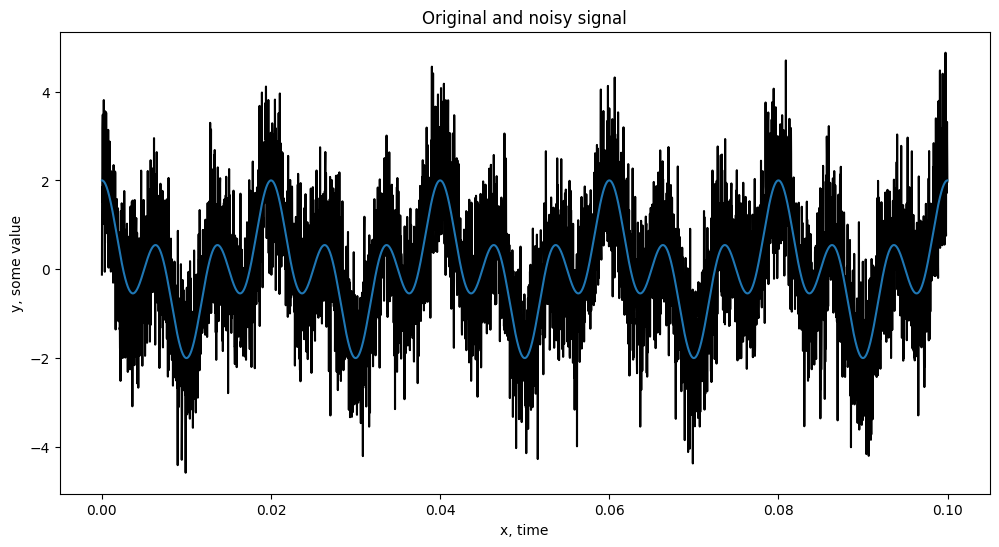

In [152]:
x_cos = np.arange(0, 0.1, 1 / 50000)
y_cos = cos_func(x_cos)
y_cos_noise = y_cos + np.random.normal(0, 1, 5000)

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos_noise, 'black')
plt.plot(x_cos, y_cos)
plt.title("Original and noisy signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [153]:
def mean_filter(y, k):
    res = np.copy(y)
    for index in range(len(y[k:-k])):
        index += k
        sum = 0
        for offset in range(2 * k + 1):
            sum += y[index - k + offset]
        res[index] = (sum / (2 * k + 1))
    return res

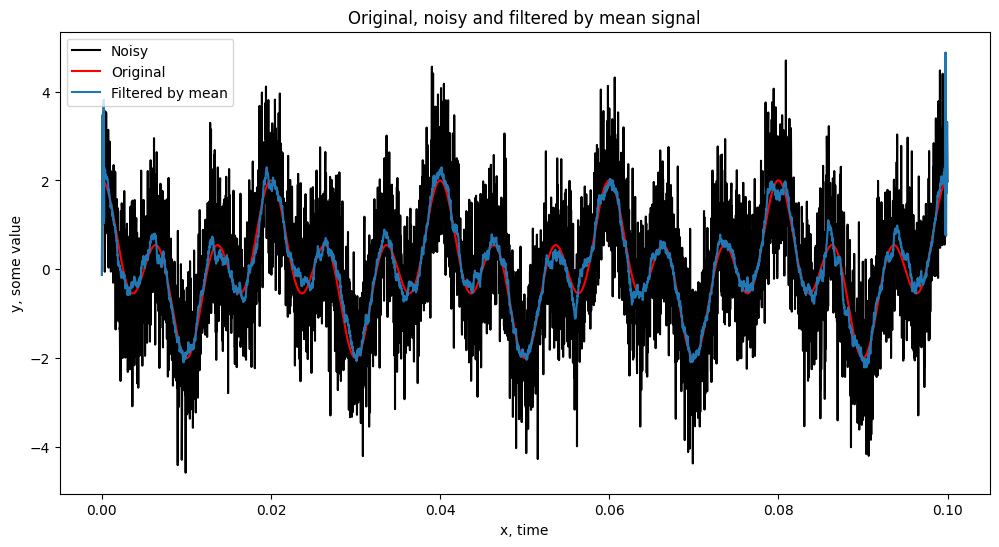

In [154]:
y_cos_noise_mean_filtered = mean_filter(y_cos_noise, 15)

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos_noise, 'black')
plt.plot(x_cos, y_cos, 'red')
plt.plot(x_cos, y_cos_noise_mean_filtered)
plt.title("Original, noisy and filtered by mean signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Noisy', 'Original', 'Filtered by mean'])
plt.show()

In [155]:
def gauss_filter(y, w, k):
    res = np.copy(y)
    for index in range(len(y[k:-k])):
        index += k
        sum = 0
        for offset in range(2 * k + 1):
            curr = y[index - k + offset]
            sum += curr * np.exp((-4 * np.log(2) * curr ** 2) / (w ** 2))
        res[index] = sum
    return res

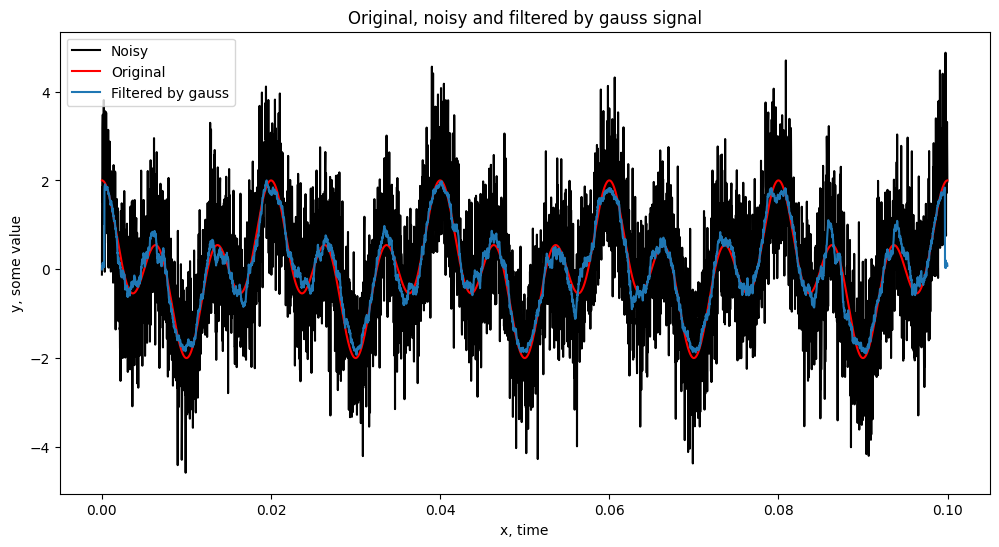

In [156]:
y_cos_noise_gauss_filtered = gauss_filter(y_cos_noise, 7, 15)
y_cos_noise_gauss_filtered *= np.max(y_cos) / np.max(y_cos_noise_gauss_filtered)

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos_noise, 'black')
plt.plot(x_cos, y_cos, 'red')
plt.plot(x_cos, y_cos_noise_gauss_filtered)
plt.title("Original, noisy and filtered by gauss signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Noisy', 'Original', 'Filtered by gauss'])
plt.show()

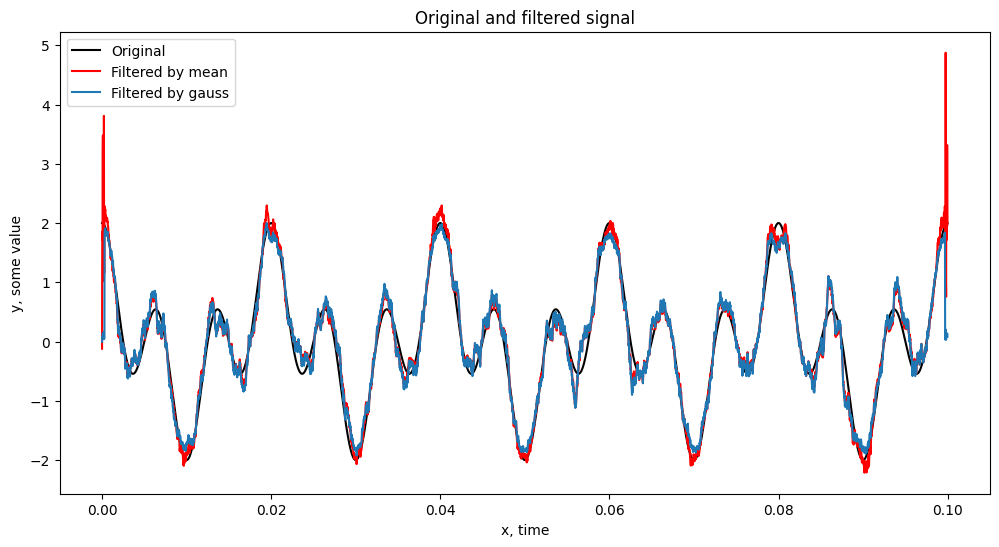

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos, 'black')
plt.plot(x_cos, y_cos_noise_mean_filtered, 'red')
plt.plot(x_cos, y_cos_noise_gauss_filtered)
plt.title("Original and filtered signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by mean', 'Filtered by gauss'])
plt.show()

In [158]:
def long_cos_func(x):
    f_1 = 50
    f_2 = 75
    f_3 = 120
    w_1 = 2 * np.pi * f_1
    w_2 = 2 * np.pi * f_2
    w_3 = 2 * np.pi * f_3
    return np.cos(w_1 * x) + np.cos(w_2 * x) + np.cos(w_3 * x)

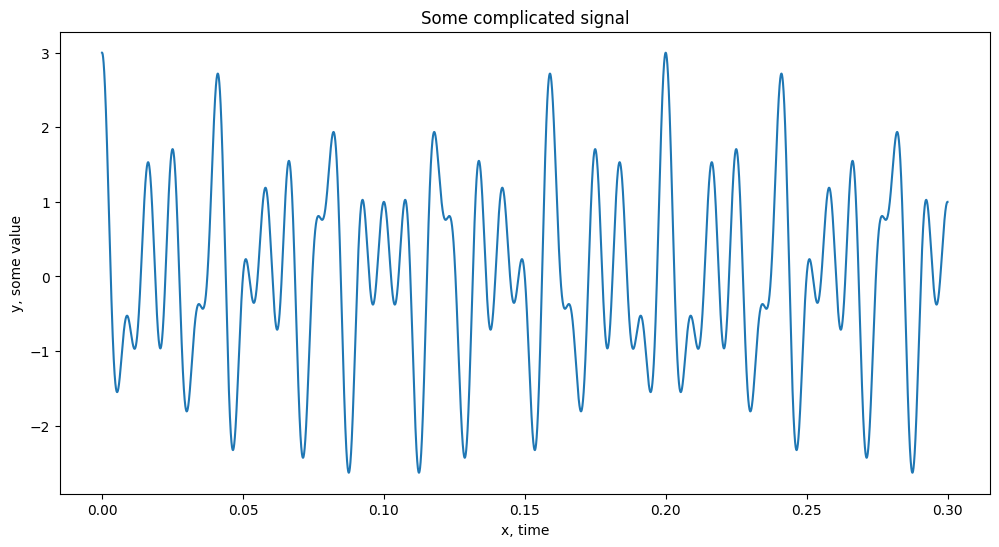

In [159]:
x_long_cos = np.arange(0, 0.3, 1 / 1500000)
y_long_cos = long_cos_func(x_long_cos)

plt.figure(figsize=(12, 6))
plt.plot(x_long_cos, y_long_cos)
plt.title("Some complicated signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

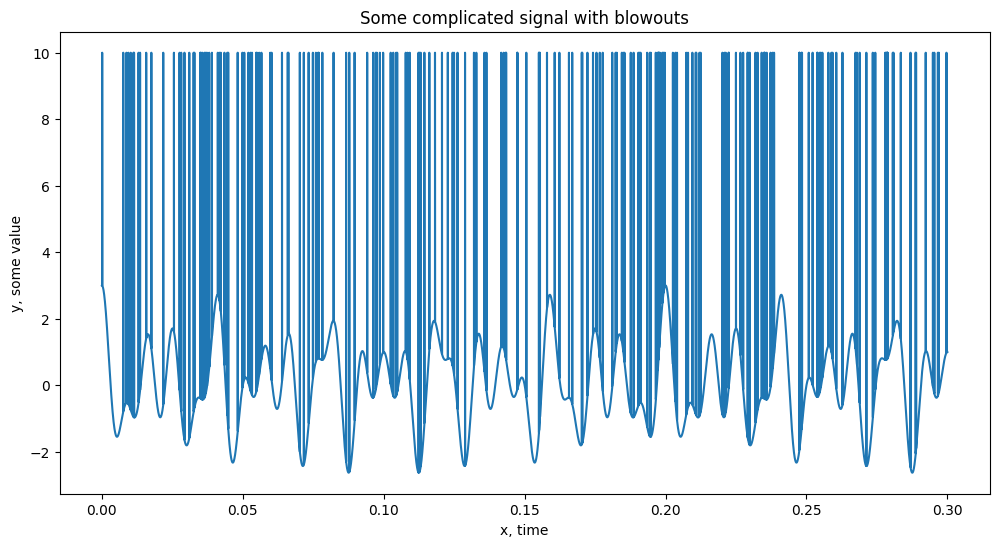

In [160]:
ids_for_blowouts = np.random.choice([0, 1], size=1500000, p=[0.9995, 0.0005])
y_long_cos_blowouts = []
for id in range(len(y_long_cos)):
    if ids_for_blowouts[id] == 1:
        y_long_cos_blowouts.append(10)
    else:
        y_long_cos_blowouts.append(y_long_cos[id])
y_long_cos_blowouts = np.array(y_long_cos_blowouts)

plt.figure(figsize=(12, 6))
plt.plot(x_long_cos, y_long_cos_blowouts)
plt.title("Some complicated signal with blowouts")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

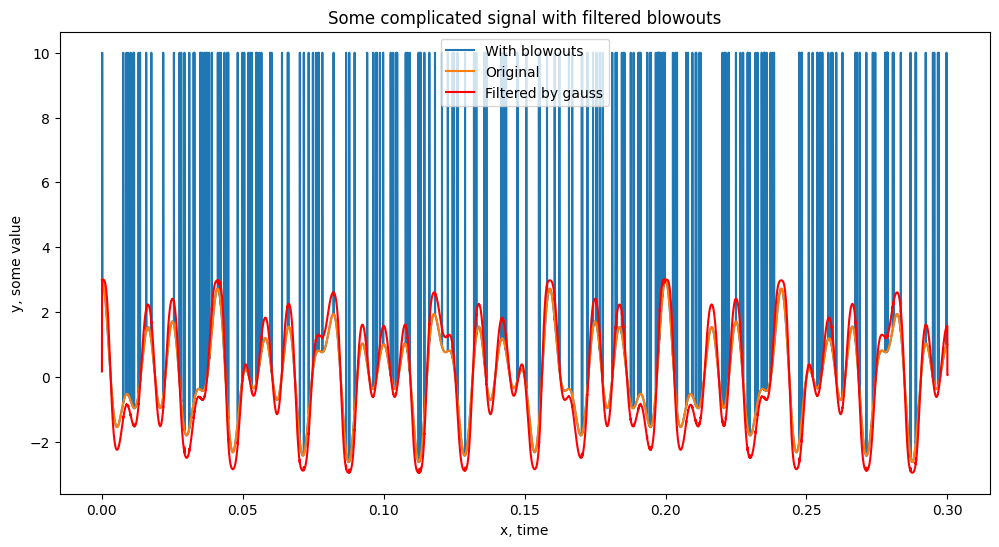

In [163]:
y_long_cos_blowouts_gauss_filtered = gauss_filter(y_long_cos_blowouts, 7, 15)
y_long_cos_blowouts_gauss_filtered *= np.max(y_long_cos) / np.max(y_long_cos_blowouts_gauss_filtered)

plt.figure(figsize=(12, 6))
plt.plot(x_long_cos, y_long_cos_blowouts)
plt.plot(x_long_cos, y_long_cos)
plt.plot(x_long_cos, y_long_cos_blowouts_gauss_filtered, 'red')
plt.title("Some complicated signal with filtered blowouts")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['With blowouts', 'Original', 'Filtered by gauss'])
plt.show()

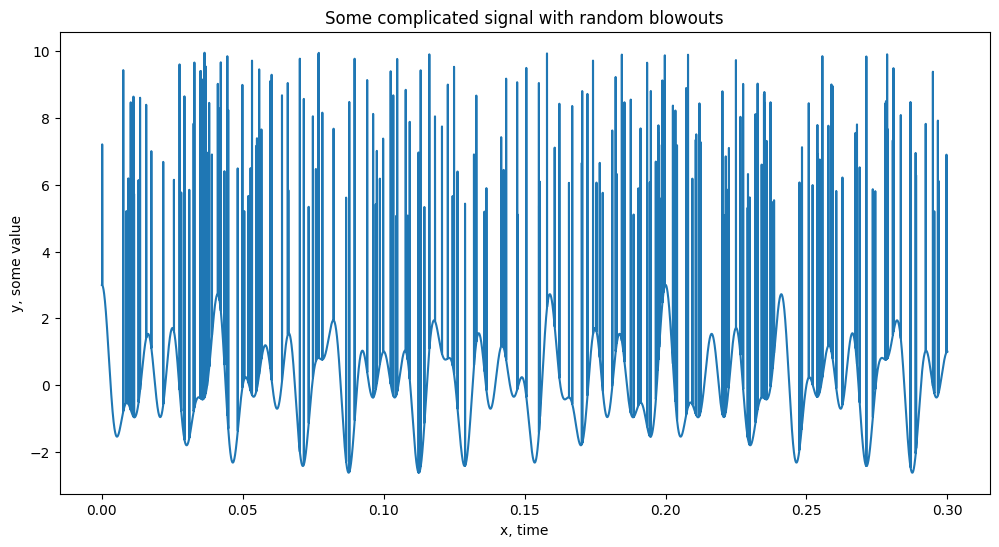

In [168]:
y_long_cos_random_blowouts = []
for id in range(len(y_long_cos)):
    if ids_for_blowouts[id] == 1:
        y_long_cos_random_blowouts.append(np.random.uniform(5, 10))
    else:
        y_long_cos_random_blowouts.append(y_long_cos[id])
y_long_cos_random_blowouts = np.array(y_long_cos_random_blowouts)

plt.figure(figsize=(12, 6))
plt.plot(x_long_cos, y_long_cos_random_blowouts)
plt.title("Some complicated signal with random blowouts")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [169]:
def median_filter(y, k):
    res = np.copy(y)
    for index in range(len(y[k:-k])):
        index += k
        res[index] = np.median(res[index - k:index + k])
    return res

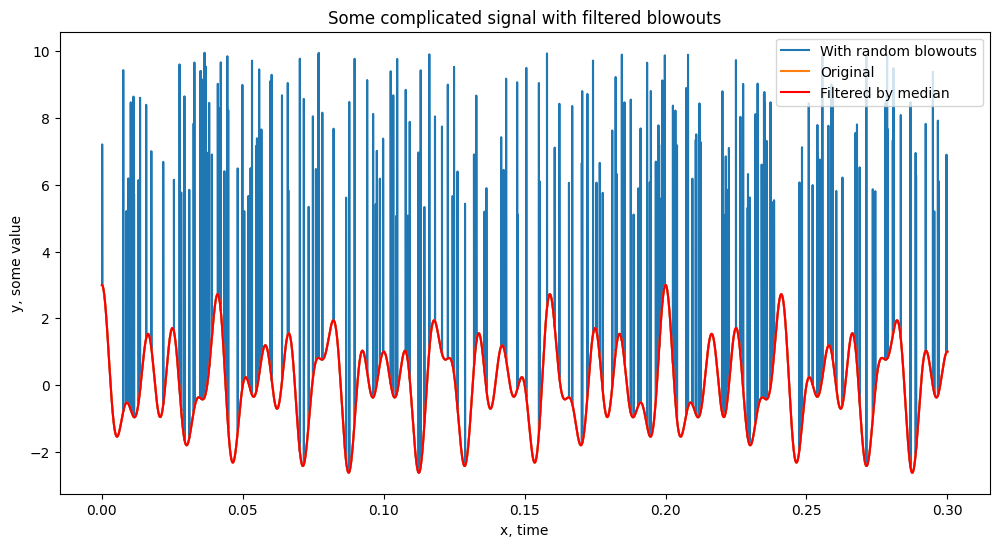

In [170]:
y_long_cos_random_blowouts_median_filtered = median_filter(y_long_cos_random_blowouts, 10)

plt.figure(figsize=(12, 6))
plt.plot(x_long_cos, y_long_cos_random_blowouts)
plt.plot(x_long_cos, y_long_cos)
plt.plot(x_long_cos, y_long_cos_random_blowouts_median_filtered, 'red')
plt.title("Some complicated signal with filtered blowouts")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['With random blowouts', 'Original', 'Filtered by median'])
plt.show()

In [181]:
def some_func(x):
    return cos_func(x) * np.exp(-x / 0.05)

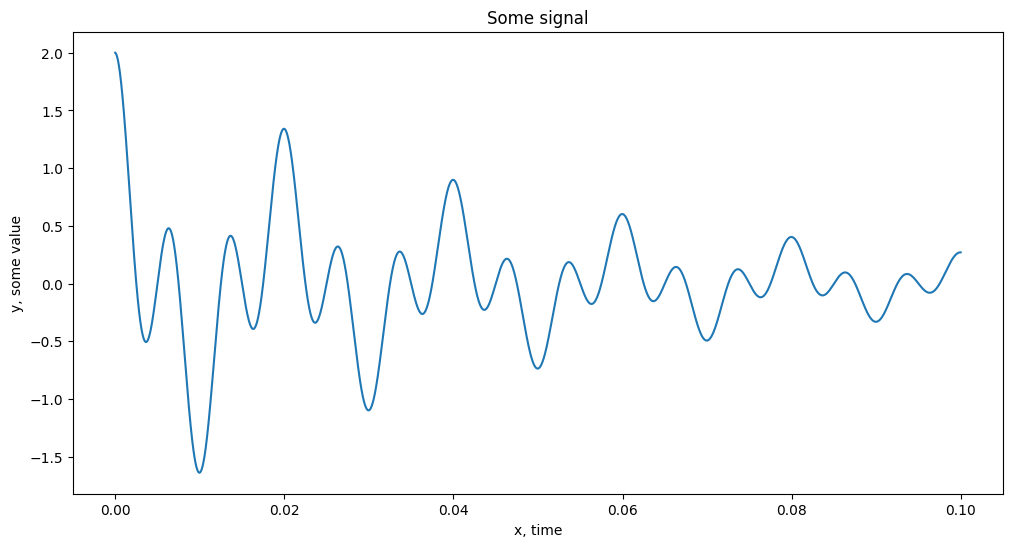

In [211]:
x_some = np.arange(0, 0.1, 1 / 50000)
y_some = some_func(x_some)

plt.figure(figsize=(12, 6))
plt.plot(x_some, y_some)
plt.title("Some signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

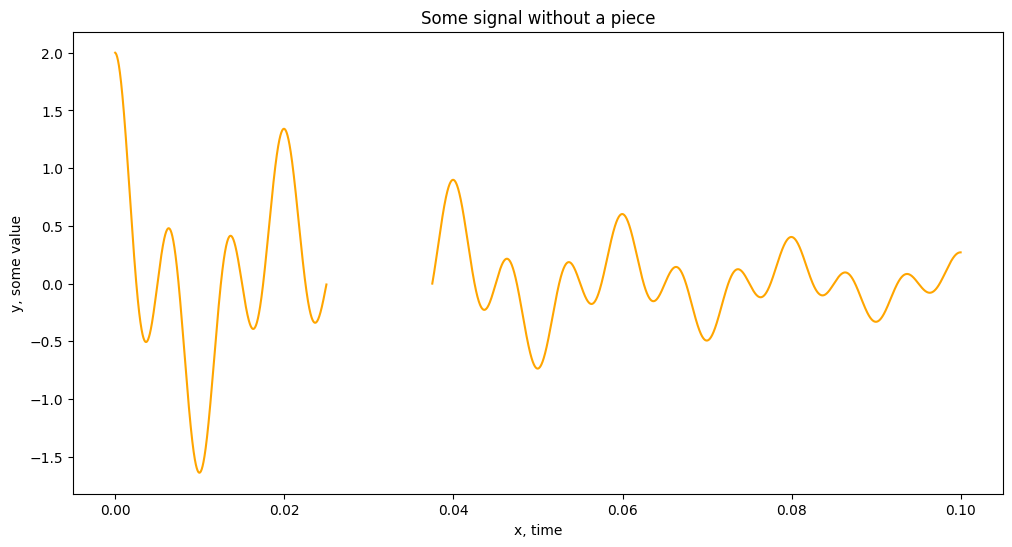

In [212]:
mark = 625
x_some_left = x_some[:2 * mark]
y_some_left = y_some[:2 * mark]
x_some_right = x_some[3 * mark:]
y_some_right = y_some[3 * mark:]

plt.figure(figsize=(12, 6))
plt.plot(x_some_left, y_some_left, 'orange')
plt.plot(x_some_right, y_some_right, 'orange')
plt.title("Some signal without a piece")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [213]:
def restore_signal(y_left, y_right):
    y_left_fft = np.fft.fft(y_left)
    y_right_fft = np.fft.fft(y_right)
    
    y_mid_fft = (y_left_fft + y_right_fft) / 2
    
    y_mid = np.fft.ifft(y_mid_fft)
    return y_mid

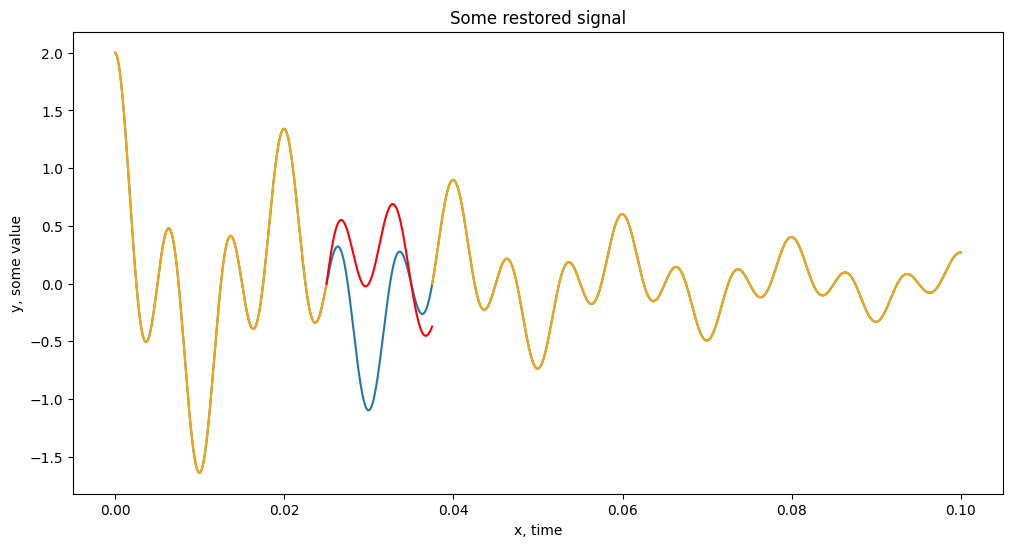

In [216]:
x_some_restored = x_some[2 * mark:3 * mark]
y_some_restored = restore_signal(y_some_left[mark:], y_some_right[:mark])

plt.figure(figsize=(12, 6))
plt.plot(x_some, y_some)
plt.plot(x_some_left, y_some_left, 'orange')
plt.plot(x_some_restored, y_some_restored, 'red')
plt.plot(x_some_right, y_some_right, 'orange')
plt.title("Some restored signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


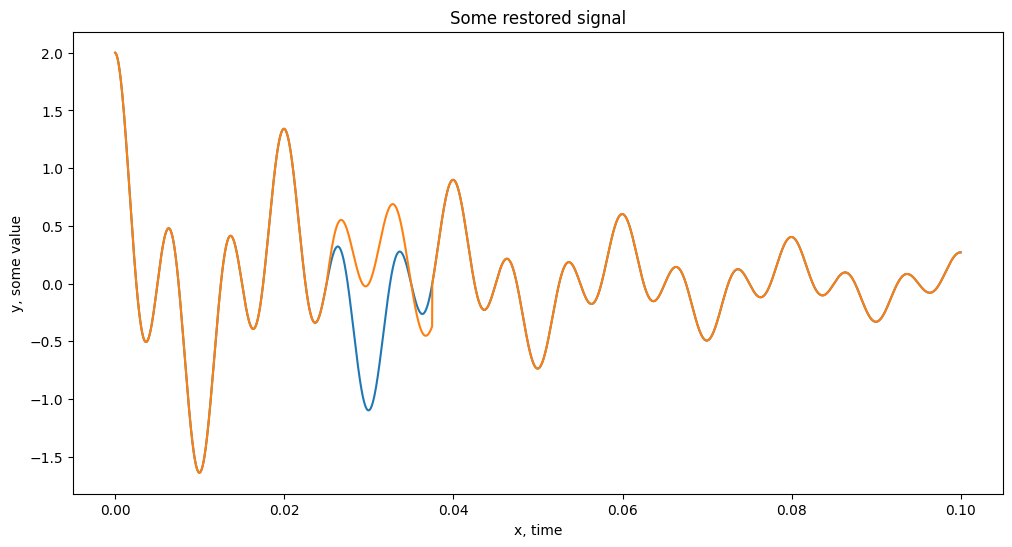

In [225]:
y_some_full = np.concatenate((y_some_left, y_some_restored, y_some_right), axis=0)

plt.figure(figsize=(12, 6))
plt.plot(x_some, y_some)
plt.plot(x_some, y_some_full)
plt.title("Some restored signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

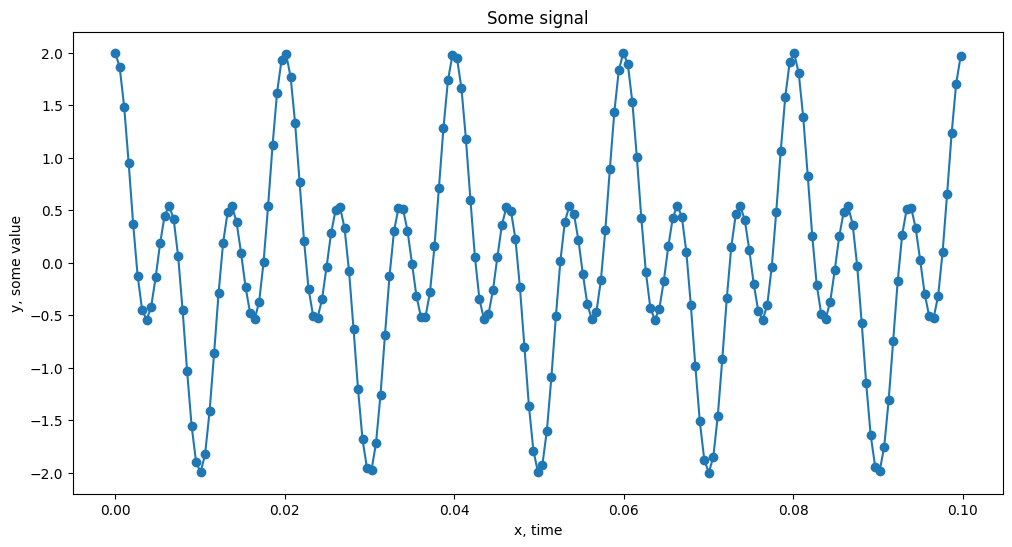

In [276]:
sample_rate = 2 * (2 * np.pi * 150)

x_low = np.arange(0, 0.1, 1 / sample_rate)
y_low = cos_func(x_low)

plt.figure(figsize=(12, 6))
plt.scatter(x_low, y_low)
plt.plot(x_low, y_low)
plt.title("Some signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [277]:
def downsample(y, w):
    sos = signal.butter(10, w, 'low', output='sos')
    filtered = signal.sosfilt(sos, y)
    
    res = []
    for i in range(len(y)):
        if i % 2 == 0:
            res.append(filtered[i])
    
    return np.array(res)

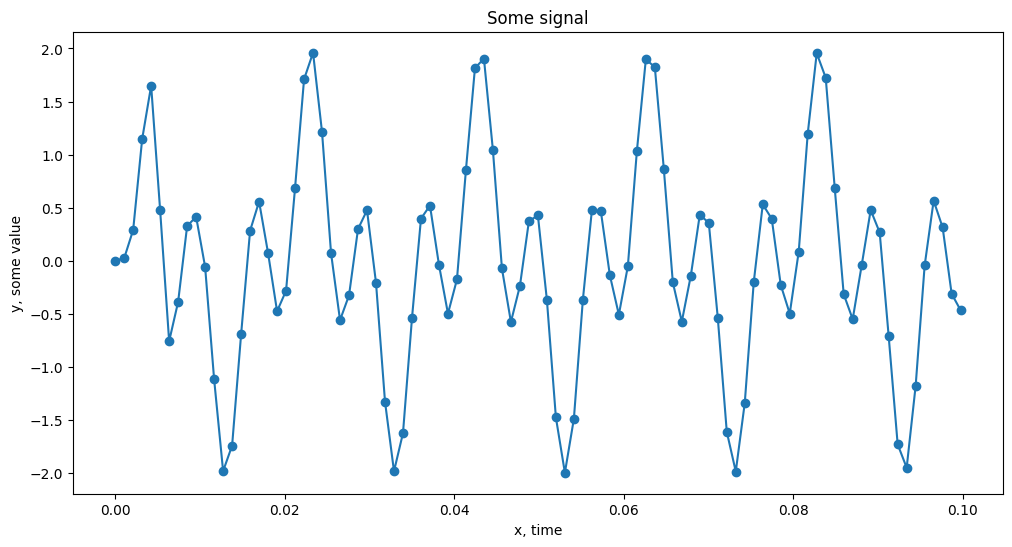

In [278]:
sample_rate /= 2

x_lower = np.arange(0, 0.1, 1 / sample_rate)
y_lower = downsample(y_low, 50 / 150)

plt.figure(figsize=(12, 6))
plt.scatter(x_lower, y_lower)
plt.plot(x_lower, y_lower)
plt.title("Some signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

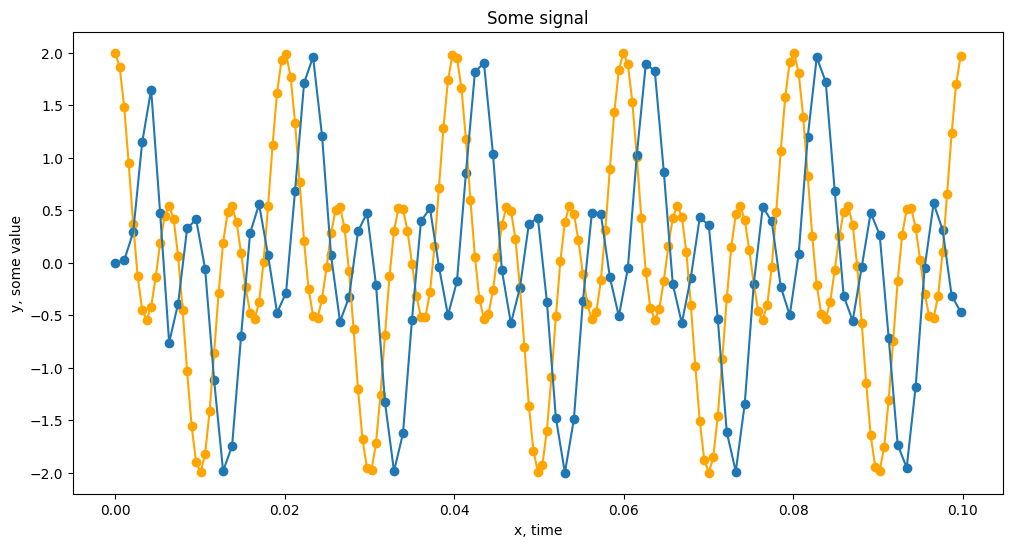

In [281]:
plt.figure(figsize=(12, 6))
plt.scatter(x_low, y_low, c='orange')
plt.plot(x_low, y_low, 'orange')
plt.scatter(x_lower, y_lower)
plt.plot(x_lower, y_lower)
plt.title("Some signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [ ]:
rate_1 = 5
rate_2 = 